# Randomized Image Sampling for Explanations (RISE)

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize
from tqdm import tqdm

## Model Definition

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras import backend as K
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class Model():
    def __init__(self):
        K.set_learning_phase(0)
        self.model = tf.keras.models.load_model('/content/drive/Othercomputers/Mylaptop/ACE_TCAV/ace/vgg16_animal_8_may.h5')#torch.load('/content/drive/MyDrive/MG/work_space/InvertibleCE/VGG16IC.pt')
        self.input_size = (224, 224)

    def run_on_batch(self, x):
        return self.model.predict(x)

### Load and preprocess image

In [ ]:
import keras.utils as image

In [ ]:
def load_img(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

## RISE

In [ ]:
def generate_masks(N, s, p1):
    cell_size = np.ceil(np.array(model.input_size) / s)
    up_size = (s + 1) * cell_size

    grid = np.random.rand(N, s, s) < p1
    grid = grid.astype('float32')

    masks = np.empty((N, *model.input_size))

    for i in tqdm(range(N), desc='Generating masks'):
        # Random shifts
        x = np.random.randint(0, cell_size[0])
        y = np.random.randint(0, cell_size[1])
        # Linear upsampling and cropping
        masks[i, :, :] = resize(grid[i], up_size, order=1, mode='reflect',
                                anti_aliasing=False)[x:x + model.input_size[0], y:y + model.input_size[1]]
    masks = masks.reshape(-1, *model.input_size, 1)
    return masks

In [ ]:
batch_size = 100

def explain(model, inp, masks):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
    preds = np.concatenate(preds)
    sal = preds.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)
    sal = sal / N / p1
    return sal

---

## Running explanations

In [ ]:
def class_name(idx):
    return decode_predictions(np.eye(1, 10, idx))[0][0][1]

In [ ]:
model = Model()

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [ ]:
import glob

/content/drive/Othercomputers/Mylaptop/explenation_prepare/ankieta/zebra/1


Explaining:   0%|          | 0/20 [00:00<?, ?it/s]

4/4 [==============================] - 0s 134ms/step


Explaining:   5%|▌         | 1/20 [00:00<00:12,  1.54it/s]

4/4 [==============================] - 0s 105ms/step


Explaining:  10%|█         | 2/20 [00:01<00:10,  1.66it/s]

4/4 [==============================] - 0s 105ms/step


Explaining:  15%|█▌        | 3/20 [00:02<00:11,  1.42it/s]

4/4 [==============================] - 0s 105ms/step


Explaining:  20%|██        | 4/20 [00:02<00:12,  1.33it/s]

4/4 [==============================] - 0s 105ms/step


Explaining:  25%|██▌       | 5/20 [00:03<00:11,  1.26it/s]

4/4 [==============================] - 0s 105ms/step


Explaining:  30%|███       | 6/20 [00:04<00:09,  1.40it/s]

4/4 [==============================] - 0s 105ms/step


Explaining:  35%|███▌      | 7/20 [00:04<00:08,  1.50it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  40%|████      | 8/20 [00:05<00:08,  1.39it/s]

4/4 [==============================] - 0s 105ms/step


Explaining:  45%|████▌     | 9/20 [00:06<00:08,  1.32it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  50%|█████     | 10/20 [00:07<00:06,  1.43it/s]

4/4 [==============================] - 0s 105ms/step


Explaining:  55%|█████▌    | 11/20 [00:07<00:05,  1.52it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  60%|██████    | 12/20 [00:08<00:05,  1.40it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  65%|██████▌   | 13/20 [00:09<00:05,  1.31it/s]

4/4 [==============================] - 0s 108ms/step


Explaining:  70%|███████   | 14/20 [00:10<00:04,  1.28it/s]

4/4 [==============================] - 0s 107ms/step


Explaining:  75%|███████▌  | 15/20 [00:11<00:04,  1.23it/s]

4/4 [==============================] - 0s 107ms/step


Explaining:  80%|████████  | 16/20 [00:11<00:03,  1.33it/s]

4/4 [==============================] - 0s 107ms/step


Explaining:  85%|████████▌ | 17/20 [00:12<00:02,  1.40it/s]

4/4 [==============================] - 0s 109ms/step


Explaining:  90%|█████████ | 18/20 [00:12<00:01,  1.47it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  95%|█████████▌| 19/20 [00:13<00:00,  1.38it/s]

4/4 [==============================] - 0s 106ms/step


Explaining: 100%|██████████| 20/20 [00:14<00:00,  1.37it/s]


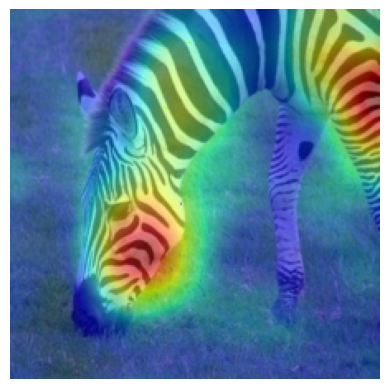

/content/drive/Othercomputers/Mylaptop/explenation_prepare/ankieta/zebra/2


Explaining:   0%|          | 0/20 [00:00<?, ?it/s]

4/4 [==============================] - 0s 127ms/step


Explaining:   5%|▌         | 1/20 [00:00<00:15,  1.20it/s]

4/4 [==============================] - 0s 107ms/step


Explaining:  10%|█         | 2/20 [00:01<00:15,  1.15it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  15%|█▌        | 3/20 [00:02<00:14,  1.14it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  20%|██        | 4/20 [00:03<00:14,  1.13it/s]

4/4 [==============================] - 0s 105ms/step


Explaining:  25%|██▌       | 5/20 [00:04<00:11,  1.26it/s]

4/4 [==============================] - 0s 105ms/step


Explaining:  30%|███       | 6/20 [00:04<00:10,  1.40it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  35%|███▌      | 7/20 [00:05<00:08,  1.47it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  40%|████      | 8/20 [00:05<00:07,  1.54it/s]

4/4 [==============================] - 0s 107ms/step


Explaining:  45%|████▌     | 9/20 [00:06<00:06,  1.60it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  50%|█████     | 10/20 [00:07<00:06,  1.65it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  55%|█████▌    | 11/20 [00:07<00:05,  1.68it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  60%|██████    | 12/20 [00:08<00:05,  1.50it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  65%|██████▌   | 13/20 [00:09<00:05,  1.39it/s]

4/4 [==============================] - 0s 107ms/step


Explaining:  70%|███████   | 14/20 [00:10<00:04,  1.33it/s]

4/4 [==============================] - 0s 107ms/step


Explaining:  75%|███████▌  | 15/20 [00:10<00:03,  1.27it/s]

4/4 [==============================] - 0s 107ms/step


Explaining:  80%|████████  | 16/20 [00:11<00:03,  1.25it/s]

4/4 [==============================] - 0s 106ms/step


Explaining:  85%|████████▌ | 17/20 [00:12<00:02,  1.23it/s]

4/4 [==============================] - 0s 107ms/step


Explaining:  90%|█████████ | 18/20 [00:13<00:01,  1.22it/s]

4/4 [==============================] - 0s 107ms/step


Explaining:  95%|█████████▌| 19/20 [00:14<00:00,  1.34it/s]

4/4 [==============================] - 0s 108ms/step


Explaining: 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]


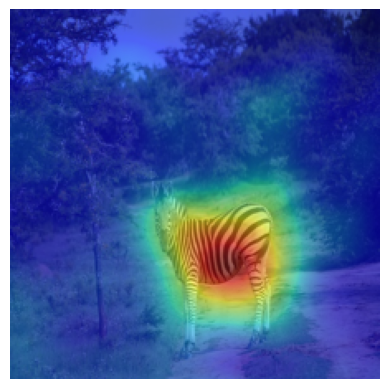

/content/drive/Othercomputers/Mylaptop/explenation_prepare/ankieta/zebra/3


In [ ]:
MASTER_PATH = '/content/drive/Othercomputers/Mylaptop/explenation_prepare/ankieta/'
klasa = 'zebra'
#take images from folder MASTER_PATH + klasa
class_idx = 9

# for klasa in os.listdir(MASTER_PATH):
for path in glob.glob(MASTER_PATH + klasa +"/*"):
    print(path)
    img_main_pathes = glob.glob(path +"/*.png")
    if len(img_main_pathes) > 0:
      img, x = load_img(img_main_pathes[0])
      N = 2000
      s = 8
      p1 = 0.1
      masks = generate_masks(N, s, p1)
      sal = explain(model, x, masks)
      image.save_img(path + "/RISE/" + klasa + ".jpg" , np.expand_dims(sal[class_idx],2))


      plt.axis('off')
      plt.imshow(img)
      plt.imshow(sal[class_idx], cmap='jet', alpha=0.5)
      # plt.colorbar()
      plt.show()


